<a href="https://colab.research.google.com/github/baraa-hakawati/Car-Insurance-Claim-Analysis/blob/main/Time_Series_Belt_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Belt Exam**

## **Part 1: Installations & Libraries**

### **Installations**

In [214]:
!pip install pmdarima

In [215]:
%pip install numpy==1.24.4

In [216]:
%pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.1 MB/s eta 0:00:00
  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 15.1 MB/s eta 0:00:00
Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.2 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.2 whi

In [1]:
%pip uninstall -y numpy pmdarima statsmodels
%pip install numpy==1.24.4 pmdarima statsmodels

Found existing installation: numpy 2.3.2
Uninstalling numpy-2.3.2:
  Successfully uninstalled numpy-2.3.2
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: statsmodels 0.14.5
Uninstalling statsmodels-0.14.5:
  Successfully uninstalled statsmodels-0.14.5
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached statsmodels-0.14.5-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (9.5 kB)
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.24.4-cp311-cp311-m

### **Libraries**

In [1]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import glob
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs, nsdiffs
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import pmdarima as pm
plt.rcParams['figure.figsize'] = (12, 4)
sns.set_context("talk", font_scale=0.9)
pd.set_option('display.max_columns', 50)
SEED = 321
np.random.seed(SEED)

## **Part 2: General Preprocessing**

### **General Overview**

In [2]:
# Load the CSV fi;e
path = "/content/drive/MyDrive/AXSOSACADEMY/05-IntermediateML/zillow_home_values-zipcode.csv"
df = pd.read_csv(path)

In [3]:
# Show basic info to understand the structure
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27442 entries, 0 to 27441
Columns: 284 entries, RegionID to 30112022
dtypes: float64(275), int64(3), object(6)
memory usage: 59.5+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31012000,29022000,31032000,30042000,31052000,30062000,31072000,31082000,30092000,31102000,30112000,31122000,31012001,28022001,31032001,30042001,...,30112020,31122020,31012021,28022021,31032021,30042021,31052021,30062021,31072021,31082021,30092021,31102021,30112021,31122021,31012022,28022022,31032022,30042022,31052022,30062022,31072022,31082022,30092022,31102022,30112022
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107261.0,107274.0,107076.0,107081.0,107112.0,107325.0,107480.0,107709.0,108092.0,108328.0,108782.0,109187.0,109242.0,109045.0,108514.0,108330.0,...,204564.0,206902.0,209154.0,212069.0,213553.0,215782.0,218494.0,223994.0,229959.0,236318.0,241418.0,246015.0,249379.0,253321.0,257274.0,261945.0,267644.0,273946.0,280066.0,285121.0,288532.0,290458.0,291103.0,292081.0,292948.0
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,222569.0,222885.0,223602.0,224818.0,224384.0,224051.0,222942.0,223281.0,222886.0,223553.0,224715.0,226127.0,226742.0,226052.0,225191.0,224344.0,...,346146.0,350598.0,354599.0,359133.0,364502.0,370992.0,377896.0,386576.0,397227.0,408018.0,417061.0,424951.0,431973.0,437659.0,443701.0,453150.0,464727.0,478369.0,489712.0,497173.0,499429.0,497572.0,498113.0,500187.0,503109.0
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,90009.0,90009.0,90042.0,90007.0,90027.0,89987.0,89972.0,89926.0,89397.0,88767.0,87904.0,87765.0,87719.0,87845.0,87409.0,87119.0,...,144471.0,146280.0,147989.0,149669.0,151475.0,153251.0,155948.0,158804.0,161832.0,164617.0,167493.0,169790.0,171741.0,173354.0,175355.0,177319.0,179463.0,182812.0,186403.0,189836.0,192064.0,193760.0,195140.0,196787.0,198137.0
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,188096.0,190588.0,192155.0,194686.0,196246.0,198131.0,200596.0,202906.0,205407.0,208731.0,212367.0,215368.0,217915.0,220488.0,223666.0,226950.0,...,583072.0,582981.0,580157.0,578240.0,577104.0,577493.0,579678.0,579581.0,579996.0,579154.0,580023.0,578203.0,576272.0,572245.0,570414.0,570211.0,572145.0,573662.0,576469.0,578706.0,580834.0,581779.0,584566.0,588188.0,590722.0
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,275983.0,277855.0,279802.0,282271.0,283679.0,284880.0,285975.0,288330.0,290339.0,293681.0,296592.0,299017.0,300344.0,302885.0,307212.0,311950.0,...,712619.0,716779.0,721142.0,722880.0,723884.0,724676.0,730056.0,733300.0,735223.0,734912.0,738325.0,741995.0,745001.0,745550.0,748738.0,752025.0,757734.0,760336.0,766163.0,771443.0,776607.0,779281.0,782367.0,788211.0,793924.0


In [4]:
# Display the number of rows and columns within the dataset
print(f"The number of records within the dataset (rows) is : {df.shape[0]}")
print(f"The mumber of features within the dataset (columns) is: {df.shape[1]}")

The number of records within the dataset (rows) is : 27442
The mumber of features within the dataset (columns) is: 284


### **Melt The dataset**

In [5]:
# Melt the dataframe into long format
id_vars = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName']
value_vars = [col for col in df.columns if col not in id_vars]
# Melt wide to long
df_long = df.melt(id_vars=id_vars, value_vars=value_vars,
                  var_name='Date', value_name='Home Value')

In [6]:
# Changes confirmation
df_long.info()
df_long.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7546550 entries, 0 to 7546549
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   RegionID    int64  
 1   SizeRank    int64  
 2   RegionName  int64  
 3   RegionType  object 
 4   StateName   object 
 5   State       object 
 6   City        object 
 7   Metro       object 
 8   CountyName  object 
 9   Date        object 
 10  Home Value  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 633.3+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,Home Value
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,31012000,107261.0
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,31012000,222569.0
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,31012000,90009.0
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,31012000,188096.0
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,31012000,275983.0


### **Data Types Handling (Date to datetime)**

In [7]:
# Convert Date to datetime
df_long['Date'] = pd.to_datetime(df_long['Date'], format='%d%m%Y', errors='coerce')
df_long.drop(columns=['StateName'], inplace=True)
df_long.dropna(subset=['Date'], inplace=True)

In [8]:
# Changes confirmation
df_long.info()
df_long.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7546550 entries, 0 to 7546549
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   RegionID    int64         
 1   SizeRank    int64         
 2   RegionName  int64         
 3   RegionType  object        
 4   State       object        
 5   City        object        
 6   Metro       object        
 7   CountyName  object        
 8   Date        datetime64[ns]
 9   Home Value  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 575.8+ MB


,RegionID,SizeRank,RegionName,RegionType,State,City,Metro,CountyName,Date,Home Value
0,91940,0,77449,zip,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,107261.0
1,91982,1,77494,zip,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2000-01-31,222569.0
2,93144,2,79936,zip,TX,El Paso,"El Paso, TX",El Paso County,2000-01-31,90009.0
3,62080,3,11368,zip,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,188096.0
4,62093,4,11385,zip,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,275983.0


In [9]:
# Display the number of rows and columns within the dataset
print(f"The number of records within the dataset (rows) is : {df_long.shape[0]}")
print(f"The mumber of features within the dataset (columns) is: {df_long.shape[1]}")

The number of records within the dataset (rows) is : 7546550
The mumber of features within the dataset (columns) is: 10


In [10]:
# set Date as index
df_long.set_index('Date', inplace=True)

In [11]:
# Final Check
df_long.head()

,RegionID,SizeRank,RegionName,RegionType,State,City,Metro,CountyName,Home Value
Date,,,,,,,,,
2000-01-31,91940,0,77449,zip,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107261.0
2000-01-31,91982,1,77494,zip,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,222569.0
2000-01-31,93144,2,79936,zip,TX,El Paso,"El Paso, TX",El Paso County,90009.0
2000-01-31,62080,3,11368,zip,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,188096.0
2000-01-31,62093,4,11385,zip,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,275983.0


### **Check Missing Values**

In [12]:
# Normalized missing values summary
missing_summary = df_long.isna().sum()
missing_percent = (missing_summary / len(df_long)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing %': missing_percent.round(2)
}).sort_values(by='Missing %', ascending=False)
missing_df[missing_df['Missing Count'] > 0]

,Missing Count,Missing %
Home Value,1836376,24.33
Metro,1645325,21.80
City,381425,5.05


### **Data Duplicates**

In [13]:
# Check whether duplicates are included within the data
print(f"\nThere are {df_long.duplicated().sum()} duplicated records within the data")


There are 1831709 duplicated records within the data


### **Unusual Data Points Identification**

In [14]:
# Define the numerical columns in the dataset
num_col = df_long.select_dtypes(include=['number']).columns
df_long[num_col]

,RegionID,SizeRank,RegionName,Home Value
Date,,,,
2000-01-31,91940,0,77449,107261.0
2000-01-31,91982,1,77494,222569.0
2000-01-31,93144,2,79936,90009.0
2000-01-31,62080,3,11368,188096.0
2000-01-31,62093,4,11385,275983.0
...,...,...,...,...
2022-11-30,80190,30657,50160,193591.0
2022-11-30,65355,30657,18081,376523.0
2022-11-30,82217,30657,55366,110082.0


In [15]:
df_long[num_col].describe() # Display the overall stats for each feature to determine unusual data points.

,RegionID,SizeRank,RegionName,Home Value
count,7.546550e+06,7.546550e+06,7.546550e+06,5.710174e+06
mean,8.065217e+04,1.423431e+04,4.878517e+04,2.254649e+05
std,2.797183e+04,8.575292e+03,2.743013e+04,2.218587e+05
min,5.819600e+04,0.000000e+00,1.001000e+03,1.003200e+04
25%,6.900800e+04,6.868000e+03,2.634800e+04,1.097430e+05
50%,7.906600e+04,1.385700e+04,4.816650e+04,1.644755e+05
75%,8.926300e+04,2.123000e+04,7.175300e+04,2.613260e+05
max,8.087390e+05,3.065700e+04,9.990100e+04,7.965762e+06


## **Part 3: Time Series Processing**

### **Data Filtering**

In [16]:
# Filter for specific states and years (2008–2018)
target_states = ['MA', 'PA', 'NY', 'NJ', 'MD']
df_filtered = df_long[
    (df_long['State'].isin(target_states)) &
    (df_long.index >= '2008-01-01') &
    (df_long.index <= '2018-12-31')
]

In [17]:
# Check the State Value Counts
df_filtered['State'].value_counts()

,count
State,
NY,211860
PA,186120
NJ,74184
MA,65736
MD,56892


In [18]:
# Time Interval Confirmation
df_filtered.index.min(), df_filtered.index.max()

(Timestamp('2008-01-31 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [19]:
# Sorting
df_filtered.sort_index(inplace=True)
df_filtered.head()

,RegionID,SizeRank,RegionName,RegionType,State,City,Metro,CountyName,Home Value
Date,,,,,,,,,
2008-01-31,62080,3,11368,zip,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,447718.0
2008-01-31,62093,4,11385,zip,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,538860.0
2008-01-31,61148,10,8701,zip,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,358246.0
2008-01-31,62046,11,11236,zip,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County,468185.0
2008-01-31,62019,14,11208,zip,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County,486673.0


### **Resampling, Pivoting, Unstacking, and Line Graph Plotting**

In [20]:
# Option 1: Resample annually by state using mean
df_yearly = (
    df_filtered
    .groupby(['State'])
    .resample('AS')  # AS = calendar year start
    ['Home Value']
    .mean()
    .reset_index()
)

/tmp/ipython-input-20-598531891.py:5: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  .resample('AS')  # AS = calendar year start


In [21]:
# Displaying Results
df_yearly.head()

,State,Date,Home Value
0,MA,2008-01-01,370276.125465
1,MA,2009-01-01,353451.300158
2,MA,2010-01-01,354704.040966
3,MA,2011-01-01,344022.053294
4,MA,2012-01-01,337760.405269


In [22]:
# Pivot for plotting
df_pivot = df_yearly.pivot(index='Date', columns='State', values='Home Value')
df_pivot.head(12)  # Display first 12 months for inspection

State,MA,MD,NJ,NY,PA
Date,,,,,
2008-01-01,370276.125465,359630.331758,419298.048266,295154.775963,196780.894388
2009-01-01,353451.300158,319528.862421,392674.667139,278740.456293,175373.028592
2010-01-01,354704.040966,305117.949273,379620.174213,271226.922109,170814.761501
2011-01-01,344022.053294,291514.457996,358189.407044,267413.730681,162272.051026
2012-01-01,337760.405269,284355.912915,341947.976072,263891.637005,157486.611419
2013-01-01,358073.753575,296858.035497,346531.070059,270369.310839,158731.094657
2014-01-01,378459.686192,306695.239216,361237.879563,284347.549166,161301.357313
2015-01-01,393671.946304,306827.054118,362191.101417,296118.281517,162618.029786
2016-01-01,407772.944176,308879.072563,364417.332934,303402.832309,163920.962799


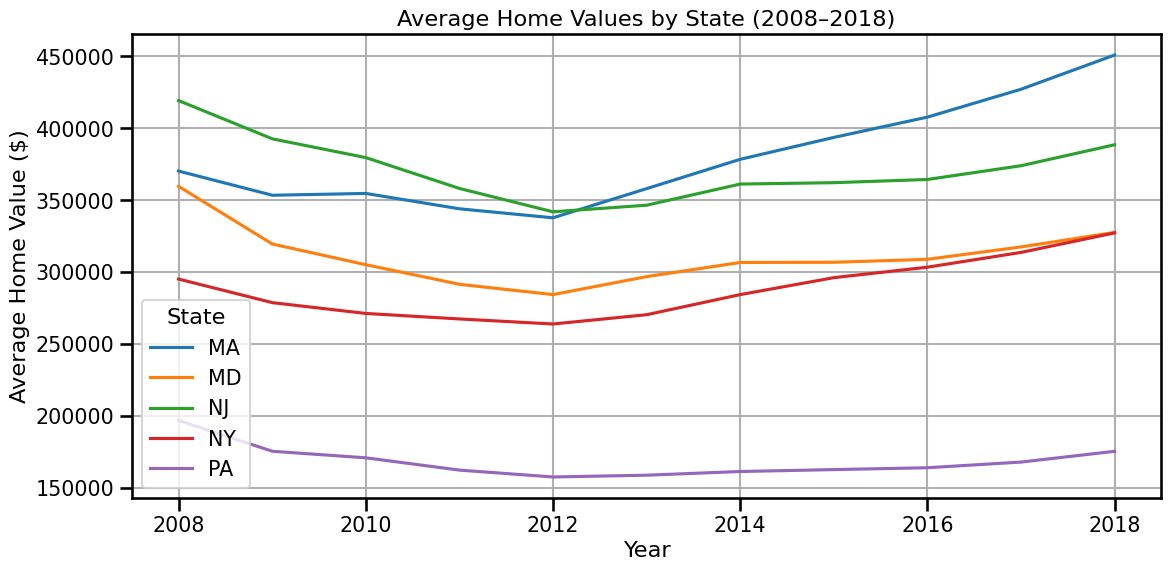

In [23]:
# Plotting
plt.figure(figsize=(12, 6))
for state in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[state], label=state)
plt.title("Average Home Values by State (2008–2018)")
plt.xlabel("Year")
plt.ylabel("Average Home Value ($)")
plt.legend(title="State")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Option 2: Resample annually by state using mean
df_yearly2 = (
    df_filtered
    .groupby(['State'])
    .resample('AS')  # AS = calendar year start
    ['Home Value']
    .mean()
)

/tmp/ipython-input-24-3035083827.py:5: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  .resample('AS')  # AS = calendar year start


In [25]:
# Displaying Results
df_yearly2.head()

State  Date      
MA     2008-01-01    370276.125465
       2009-01-01    353451.300158
       2010-01-01    354704.040966
       2011-01-01    344022.053294
       2012-01-01    337760.405269
Name: Home Value, dtype: float64

In [26]:
# Using Unstack Function
unstacked = df_yearly2.unstack(level=0)

In [27]:
# Diplying Results
unstacked.head()

State,MA,MD,NJ,NY,PA
Date,,,,,
2008-01-01,370276.125465,359630.331758,419298.048266,295154.775963,196780.894388
2009-01-01,353451.300158,319528.862421,392674.667139,278740.456293,175373.028592
2010-01-01,354704.040966,305117.949273,379620.174213,271226.922109,170814.761501
2011-01-01,344022.053294,291514.457996,358189.407044,267413.730681,162272.051026
2012-01-01,337760.405269,284355.912915,341947.976072,263891.637005,157486.611419


<Axes: xlabel='Date'>

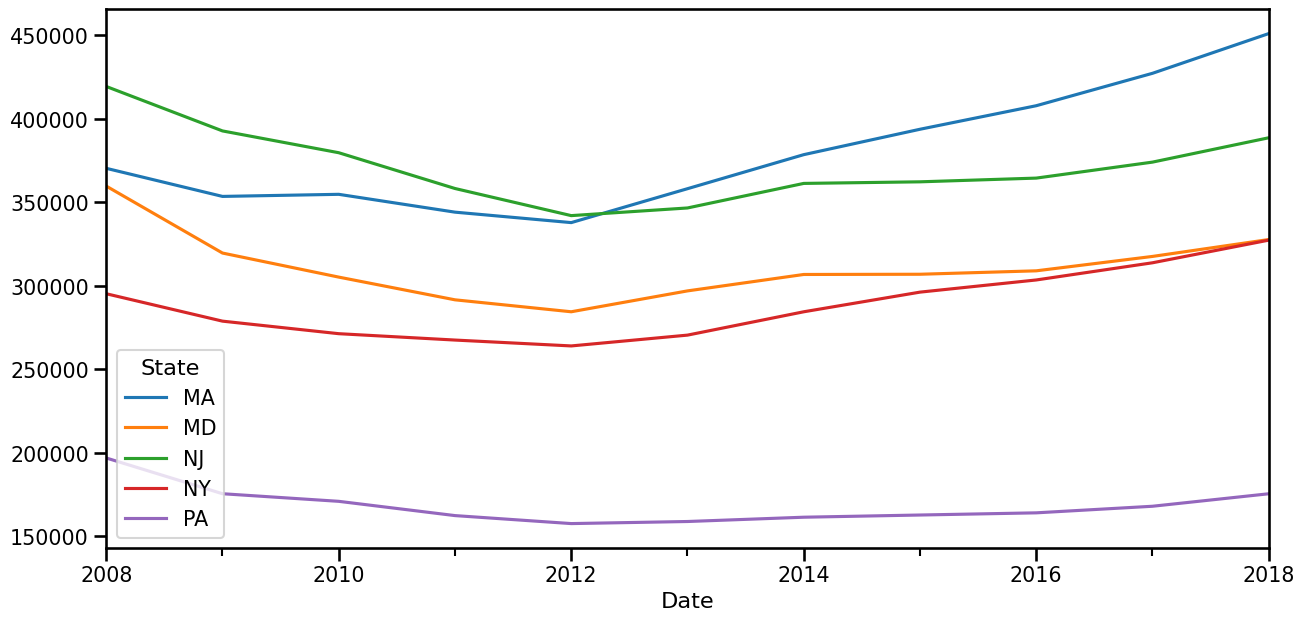

In [28]:
# Plot the unstacked Dataframe
unstacked.plot(figsize=(15,7))

## **Part 4: Forecasting**

### **Resample, Filter, and Other Processes**

In [29]:
# Preparing
grouped = df_long.groupby('State')['Home Value'].resample('M').mean()
grouped.head()

/tmp/ipython-input-29-26146748.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df_long.groupby('State')['Home Value'].resample('M').mean()


State  Date      
AK     2000-01-31    162013.153846
       2000-02-29    162853.692308
       2000-03-31    163250.384615
       2000-04-30    163874.923077
       2000-05-31    164129.384615
Name: Home Value, dtype: float64

In [30]:
# Unstacking for Level0
uns = grouped.unstack(level=0)
uns.head()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,...,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-31,162013.153846,106464.168142,72061.854237,141242.011952,275280.458893,195495.260563,189659.922535,210966.571429,160481.325581,127453.991326,116055.322449,251185.200000,113017.285714,107104.222222,175390.863402,101231.625000,101416.50,95572.662447,126020.074627,222750.040773,177961.440678,132427.022059,135009.388368,151931.386555,127797.766355,...,NaN,124993.418994,NaN,134553.654321,144945.356021,213968.752874,NaN,191390.086957,149139.939519,113291.679659,68795.560859,162508.613445,119783.003140,153532.014493,140189.773050,NaN,94071.558182,144027.892606,193814.666667,167336.432343,129430.175676,199874.714829,146617.04386,76480.744681,NaN
2000-02-29,162853.692308,106474.521739,72027.462838,141568.274900,276262.234310,196322.535211,189885.090909,212273.857143,161077.488372,127652.033251,116583.867886,249089.882353,113422.000000,106990.888889,174804.875000,102299.294118,101408.20,95866.471074,126266.641791,223462.552463,177349.666667,133001.051471,135235.052533,152623.585774,127627.324074,...,NaN,125311.534819,NaN,134957.901235,144479.944162,214925.388889,NaN,192043.891304,149708.512262,113416.626214,68855.263658,162913.172269,120191.951411,154644.528571,140162.014085,NaN,94097.755435,144219.277680,195422.436364,167860.342020,129834.554054,200104.543396,148828.33871,76591.106383,NaN
2000-03-31,163250.384615,106549.356522,72079.760943,141960.458167,277858.491213,197043.584507,190822.468531,213549.428571,161726.697674,128062.669951,116971.285425,250049.980392,113791.690476,106980.666667,173678.728643,102125.653846,101508.55,95998.641975,126404.089552,224548.940043,177601.091127,133306.617647,135620.446529,153306.401674,127876.490741,...,NaN,125560.501393,NaN,135098.740741,145219.685279,215804.291188,NaN,192611.423913,150425.416327,113614.649272,68995.049881,163011.125523,120532.100313,155617.528571,140874.804196,NaN,94177.663043,144281.272408,195616.927273,168472.882736,130262.378378,200739.543396,148231.38400,76621.776596,NaN
2000-04-30,163874.923077,106152.081301,72339.878788,142731.780876,281345.436455,198791.119718,192392.405594,216216.619048,162819.441860,128888.701970,117493.215726,251121.941176,114472.011905,107071.333333,174174.292500,102657.980769,101648.90,96444.233607,126564.477612,226643.235546,178242.167866,134666.978102,136298.975610,154817.732218,128374.620370,...,NaN,127691.989160,NaN,135494.049383,146326.949239,217648.632184,NaN,193860.086957,152035.603401,114026.227879,69241.178147,163541.908333,121215.605016,157531.885714,141550.979021,NaN,94405.025362,144537.478032,195986.618182,169616.136808,131105.783784,201964.724528,148588.85600,76764.170213,NaN
2000-05-31,164129.384615,102014.359712,72505.432886,143533.545817,285249.948997,205338.077193,193566.006993,218664.142857,163873.069767,129680.977833,118249.491935,252808.529412,115168.821429,107568.444444,175257.465000,102807.320755,102013.40,96743.995902,126853.776119,228611.331906,179163.486811,135119.832117,137179.981238,156166.254167,128975.462963,...,NaN,128241.163102,NaN,135799.000000,147479.131980,219368.494253,NaN,194927.793478,153664.150136,114523.505455,69527.306413,164176.420833,121786.064263,159250.042857,142137.756944,NaN,94653.831522,144780.821053,202223.959459,170652.579805,131859.081081,197615.785211,149274.56800,76819.989362,NaN


In [31]:
# Filtering for Massachusetts (MA)
df_ma = uns['MA'].loc['2000':'2019']
df_ma.head()

,MA
Date,
2000-01-31,222750.040773
2000-02-29,223462.552463
2000-03-31,224548.940043
2000-04-30,226643.235546
2000-05-31,228611.331906


In [32]:
# Time Interval Check UP
df_ma.index.min(), df_ma.index.max()

(Timestamp('2000-01-31 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [33]:
# Missing Values Check UP
df_ma.isna().sum()

0

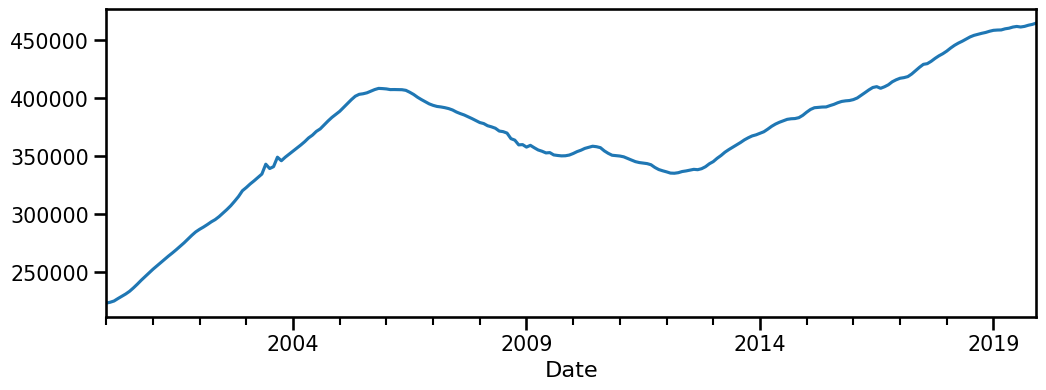

In [34]:
# Ploting Data
df_ma.plot();

### **Custom Functions**

In [35]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None,
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)
    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)

    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)
    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")
    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index,
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)
    # set the title and add legend
    ax.set_title(title)
    ax.legend();

    return fig, ax

In [36]:
def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = root_mean_squared_error(ts_true, ts_pred)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100
    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")
    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [37]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d,
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags,
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [38]:
def get_sig_lags(ts, type='ACF',  nlags=None,alpha=0.5):


    if type == 'ACF':
        # Running the function used by plot_acf
        corr_values, conf_int = tsa.stattools.acf(ts, alpha=alpha, nlags=nlags)

    elif type=='PACF':
        corr_values, conf_int = tsa.stattools.pacf(ts, alpha=alpha, nlags=nlags)

    else:
        raise Exception("type must be either 'ACF' or 'PACF'")

    # Determine lags
    lags =range(len(corr_values))

    # Create a centered version of the acf_df
    corr_df = pd.DataFrame({type:corr_values,
                            'Lags':lags,
                            'lower ci': conf_int[:,0]-corr_values, # subtract acf from lower ci to center
                            'upper ci': conf_int[:,1]-corr_values, # subtact acf to upper ci to center
                                 })
    corr_df = corr_df.set_index("Lags")

    # Getting filter for sig lags
    filter_sig_lags = (corr_df[type] < corr_df['lower ci']) | (corr_df[type] > corr_df['upper ci'])

    # Get lag #'s
    sig_lags= corr_df.index[filter_sig_lags]
    sig_lags = sig_lags[sig_lags!=0]

    return sig_lags

In [39]:
### NEW FUNCTION FOR COMBINED ACF/PACF WITH ANNOTATIONS
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5),
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},
                  annotate_seas=False, m = None,
                 seas_color='black'):

    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')
    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)

    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )
    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)

    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)

    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")
        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m
        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)

        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")
    fig.tight_layout()

    return fig

### **Decompose the Time Series**

In [40]:
# Decompose the time series
decomp = seasonal_decompose(df_ma)

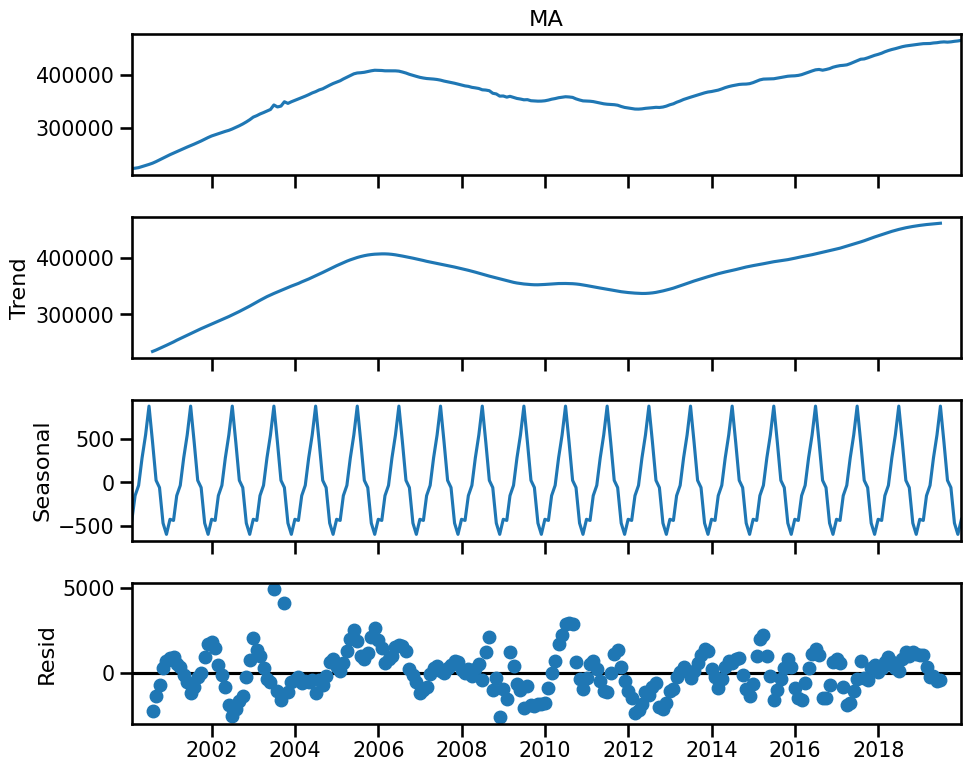

In [41]:
# Plotting
fig = decomp.plot()
fig.set_size_inches(10,8)
fig.tight_layout()

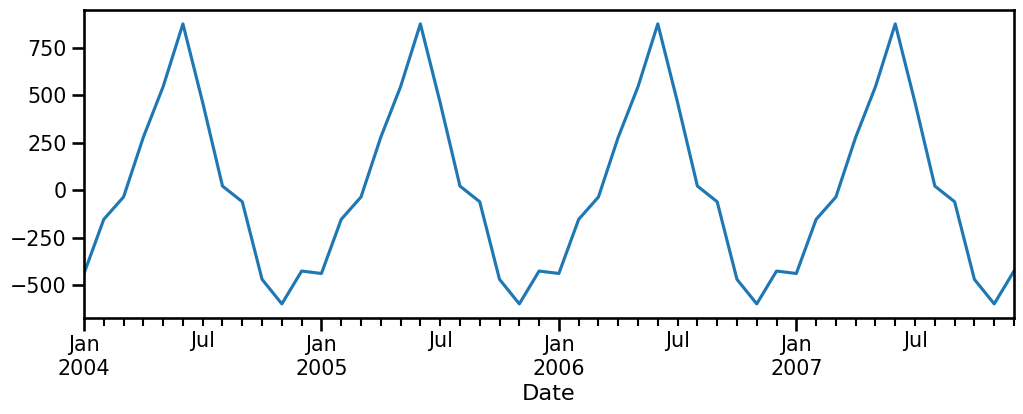

In [42]:
decomp.seasonal['2004':'2007'].plot();

In [43]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()
# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(df_ma.max()-df_ma.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is 1474.4628740798814 which is ~0.61% of the variation in time series.


### **Stationarity Check (ADF Test + Plot)**

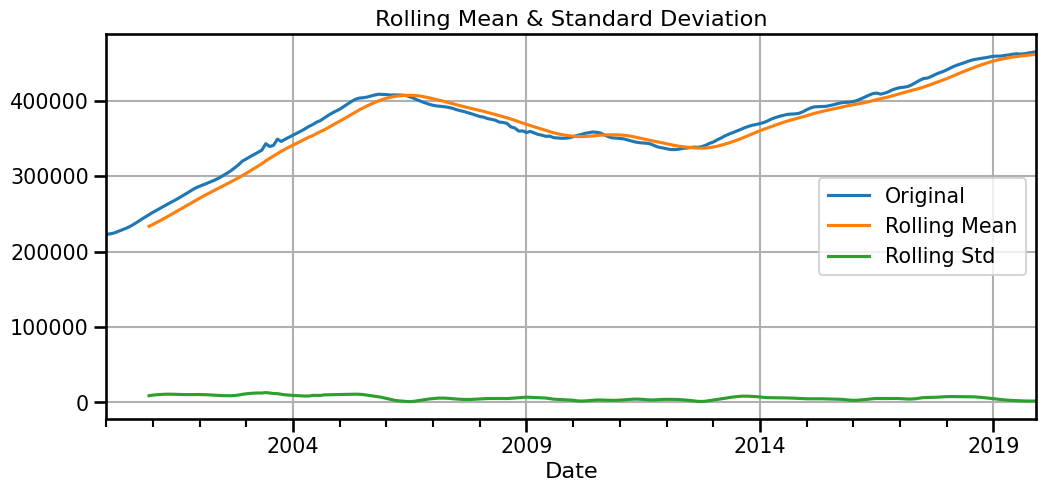

In [44]:
# Rolling statistics
df_ma.plot(label='Original', figsize=(12, 5))
df_ma.rolling(window=12).mean().plot(label='Rolling Mean')
df_ma.rolling(window=12).std().plot(label='Rolling Std')
plt.legend()
plt.title("Rolling Mean & Standard Deviation")
plt.grid()
plt.show()

In [45]:
# ADF Test
get_adfuller_results(df_ma)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-2.122535,7,232,0.23555,0.05,False


In [46]:
# Determine d using ndiffs (ADF test-based)
d = ndiffs(df_ma, test='adf')
print(f"Optimal d = {d}")
# Determine D
D = nsdiffs(df_ma, m=12)
print(f'Optimal D = {D}')

Optimal d = 2
Optimal D = 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [47]:
# Apply differencing (d=2)
ts_diff = df_ma.diff().diff().dropna();
get_adfuller_results(ts_diff)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-9.746871,5,232,0.0,0.05,True


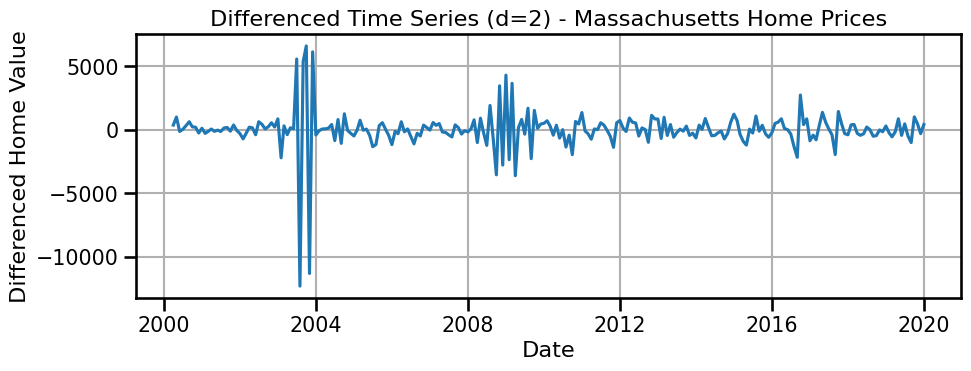

In [48]:
# Plot the differenced series
plt.figure(figsize=(10, 4))
plt.plot(ts_diff)
plt.title("Differenced Time Series (d=2) - Massachusetts Home Prices")
plt.xlabel("Date")
plt.ylabel("Differenced Home Value")
plt.grid(True)
plt.tight_layout()
plt.show()

### **ACF/PACF to Estimate Model Order**

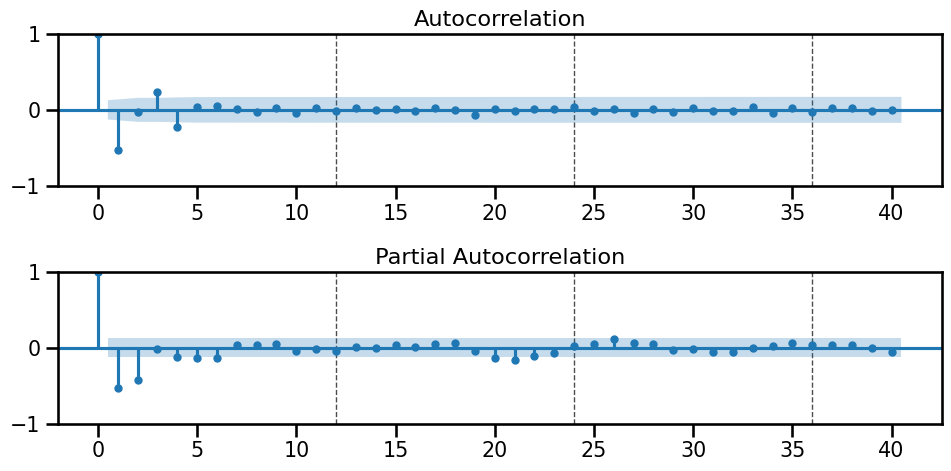

In [49]:
# ACF-PACF plot
plot_acf_pacf(ts_diff, annotate_seas = True, m = 12);

- Nonseasonal Part:

  - p = 2, d = 2, q = 0
  - There is a sudden drop in the acf plot after the first lag, but then there are lags that are out of the shade so i consider it as gradually decrease
  - The pacf plot first 2 lags stay ouside of the shaded and then suddenly drop so ill consider it as dramatic drop
  - We will use AR(1) model
- i tried ARIMA since this may be consider as gradually decrease to so i tried them both and i fould AR model is better
- Seasonal Part:
  - both seasonal lags in acf and pacf plots are gradually decreasing so P = Q = 1

  - P = 1, D = 0, Q = 1

### **Train-Test Split and Fit Manual ARIMA/SARIMA Model**

In [52]:
# Split into train/test (last 12 months as test)
train = df_ma[:-12]
test = df_ma[-12:]

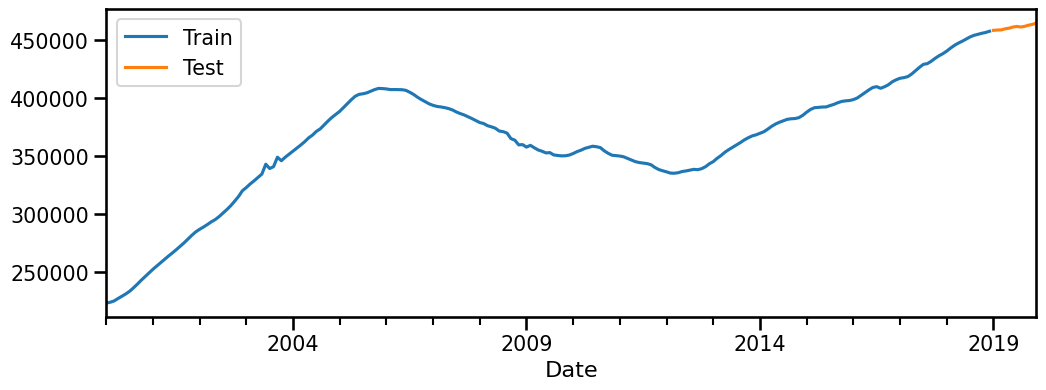

In [53]:
# Ploting
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

In [55]:
# Orders for non seasonal components
p = 1 # nonseasonal AR
d = 2  # nonseasonal differencing
q = 1 # nonseasonal MA
# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period
sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

                                    SARIMAX Results                                     
Dep. Variable:                               MA   No. Observations:                  228
Model:             ARIMA(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood               -1989.953
Date:                          Fri, 25 Jul 2025   AIC                           3989.906
Time:                                  20:48:44   BIC                           4007.009
Sample:                              01-31-2000   HQIC                          3996.808
                                   - 12-31-2018                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7150      0.230      3.106      0.002       0.264       1.166
ma.L1         -0.7600      0.239     -3.175      0.

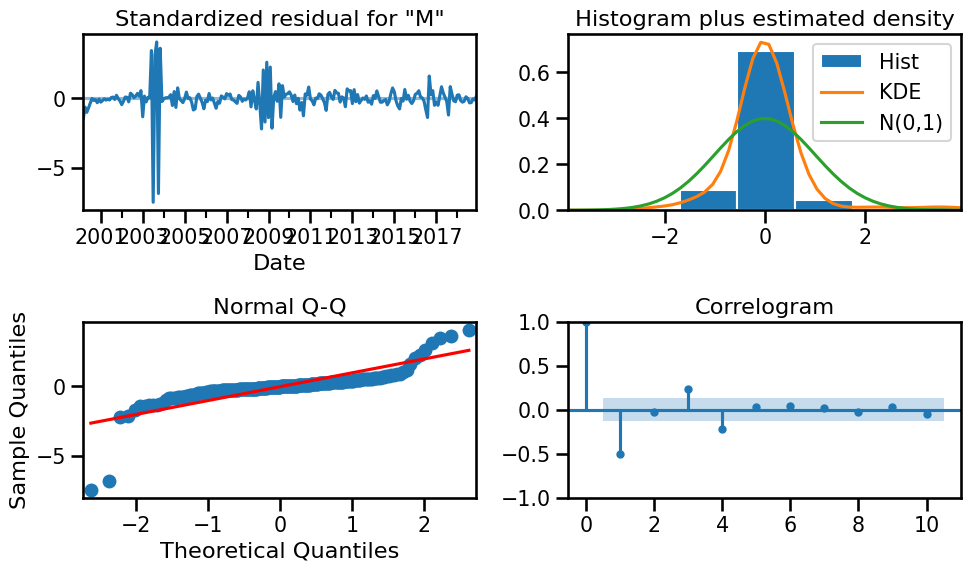

In [56]:
# Summary & diagnostics
print(sarima.summary())
sarima.plot_diagnostics(figsize=(10, 6))
plt.tight_layout()
plt.show()

### **Forecasting & Evaluating: Manual SARIMA**

In [58]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = sarima.get_forecast(steps=len(test)).summary_frame()

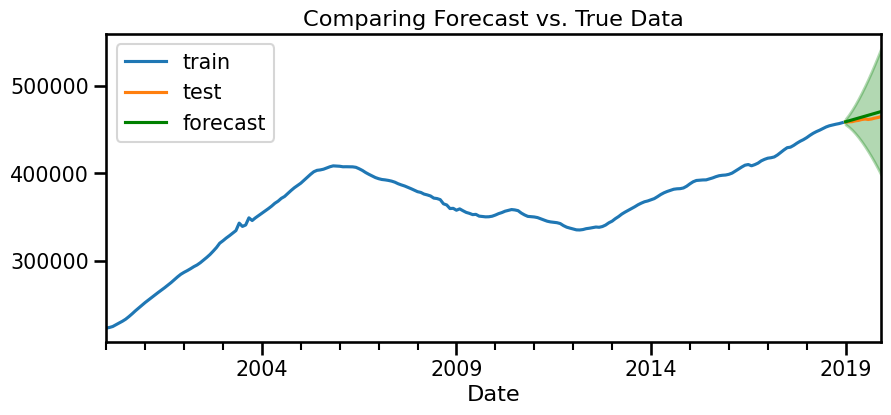

In [59]:
# Ploting
plot_forecast(train, test, forecast_df);

In [60]:
# Evaluate
regression_metrics_ts(test, forecast_df['mean'])

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 3,439.400
- MSE = 15,250,726.884
- RMSE = 3,905.218
- R^2 = -3.142
- MAPE = 0.74%


### **Auto_ARIMA for Tuning**

In [67]:
# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,
    m=12,
    trace=True
);

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=1.29 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=3988.334, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=4000.816, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,1)[12]             : AIC=4008.349, Time=0.11 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=3990.609, Time=0.06 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=3993.125, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(1,0,1)[12]             : AIC=3995.040, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=3998.822, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=3987.487, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(1,0,0)[12]             : AIC=4008.349, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(1,0,1)[12]             : AIC=inf, Time=0.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[12]             : AIC=3985.906, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(1,0,0)[12]             : AIC=3987.902, Time=0.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,1)[12]             : AIC=3987.901, Time=0.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(1,0,1)[12]             : AIC=inf, Time=1.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[12]             : AIC=3991.482, Time=0.33 sec
 ARIMA(1,2,2)(0,0,0)[12]             : AIC=4011.061, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(0,0,0)[12]             : AIC=3986.468, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(0,0,0)[12]             : AIC=3986.548, Time=0.99 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,2)(0,0,0)[12]             : AIC=4020.373, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[12] intercept   : AIC=3988.001, Time=1.57 sec

Best model:  ARIMA(1,2,1)(0,0,0)[12]          
Total fit time: 9.768 seconds


In [68]:
# the auto_arima will store our best nonseasonal and seasonal orders separtely
print(auto_model.order)
print(auto_model.seasonal_order)

(1, 2, 1)
(0, 0, 0, 12)


In [69]:
# Obtain summary of the best model from auto_arima
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  228
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -1989.953
Date:                Fri, 25 Jul 2025   AIC                           3985.906
Time:                        20:57:22   BIC                           3996.167
Sample:                    01-31-2000   HQIC                          3990.047
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7150      0.298      2.398      0.016       0.131       1.299
ma.L1         -0.7600      0.315     -2.415      0.016      -1.377      -0.143
sigma2      2.599e+06   8.58e+04     30.289      0.000    2.43e+06    2.77e+06
===================================================================================
Ljung-Box (L1) (Q):                  57.67   Jarque-Bera (JB):              5598.09
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                            -2.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

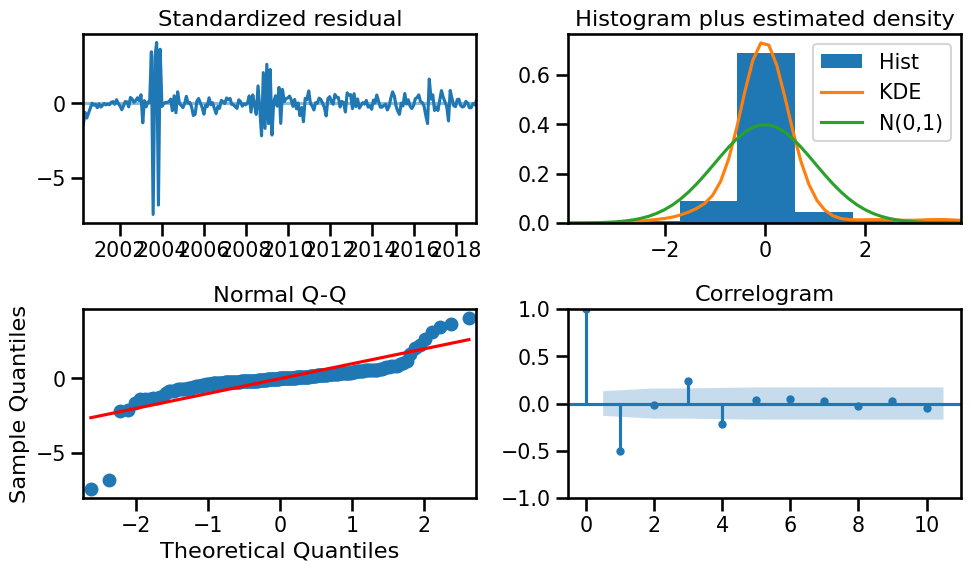

In [70]:
# Obtain diagnostic plots
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

In [72]:
# Use auto_arima parameters to fit an ARIMA
auto_model = tsa.ARIMA(
    train, order=auto_model.order, seasonal_order=auto_model.seasonal_order
).fit()

### **Forecasting & Evaluating: AUTO-ARIMA**

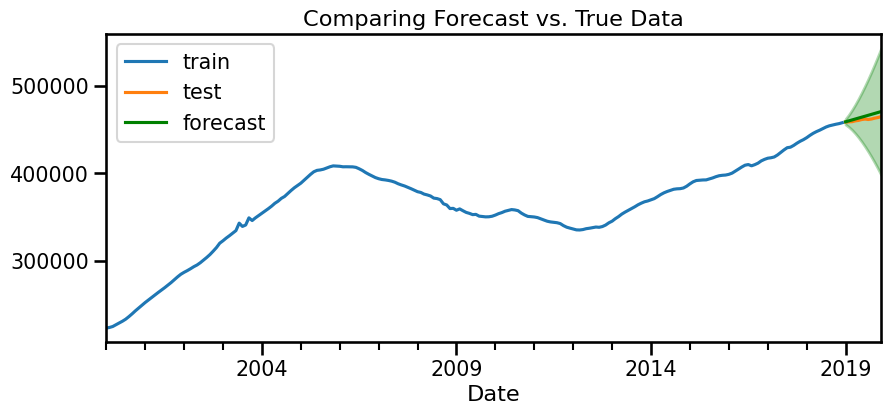

In [74]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_model.get_forecast(steps=len(test)).summary_frame()
# Ploting
plot_forecast(train, test, forecast_df);

In [75]:
# Evaluating
regression_metrics_ts(test, forecast_df['mean'])

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 3,439.174
- MSE = 15,248,616.146
- RMSE = 3,904.948
- R^2 = -3.141
- MAPE = 0.74%


### **Final Model**

In [77]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 1 # nonseasonal AR
d = 2  # nonseasonal differencing
q = 1 # nonseasonal MA
# Orders for seasonal components
P = 0  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period
final_model = tsa.ARIMA(df_ma, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

### **Forecasting & Evaluating: Final Model**

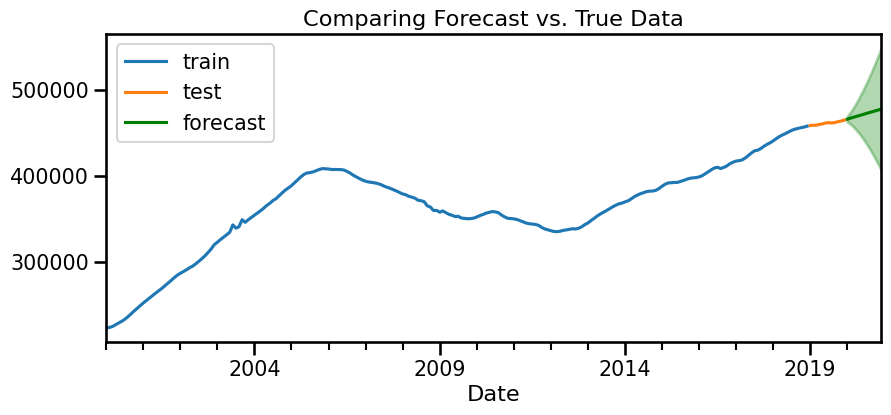

In [78]:

# Obtain future forecasts beyond test data
forecast_df  = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_df);

In [80]:
forecast_df.index[0],forecast_df.index[-1]

(Timestamp('2020-01-31 00:00:00'), Timestamp('2020-12-31 00:00:00'))

In [81]:
starting_value = forecast_df['mean'].iloc[0]
starting_value

466096.72137542156

In [82]:
final_value = forecast_df['mean'].iloc[-1]
final_value

477781.21405585285

In [83]:
change = final_value - starting_value
change

11684.492680431285

In [84]:
perc_change = (change / starting_value) * 100
perc_change

2.5068815429447984